In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection & analysis


In [2]:
#loading the data from csv files to a pandas dataframe
insurance_dataset=pd.read_csv(r"D:\capstones projects\archive (2)\insurance.csv")

In [3]:
#first 5 rows of the daatset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
#getting some informations about datsets
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features
-sex
-smoker
-region

In [6]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

data analysis

In [7]:
#statistical measures of the dataset 
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\sansk\AppData\Local\Temp\ipykernel_12496\977420731.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


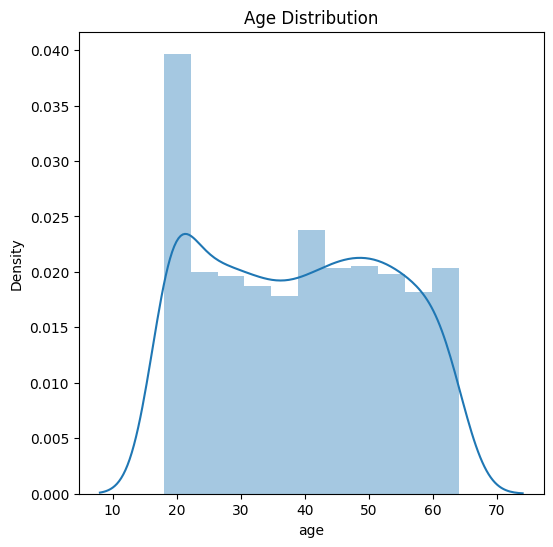

In [8]:
#distribution of age values
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()


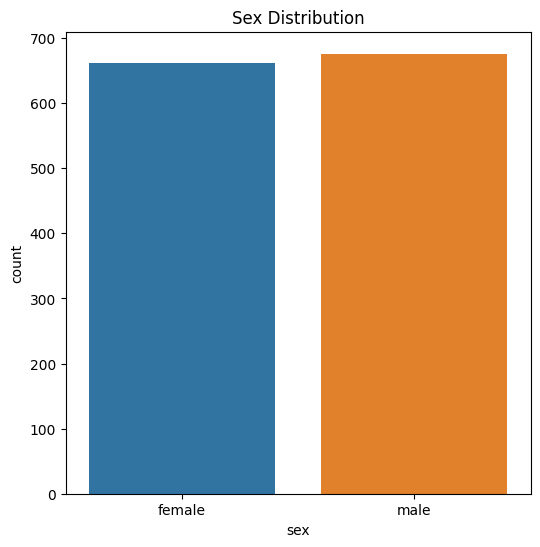

In [9]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\sansk\AppData\Local\Temp\ipykernel_12496\3911515227.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


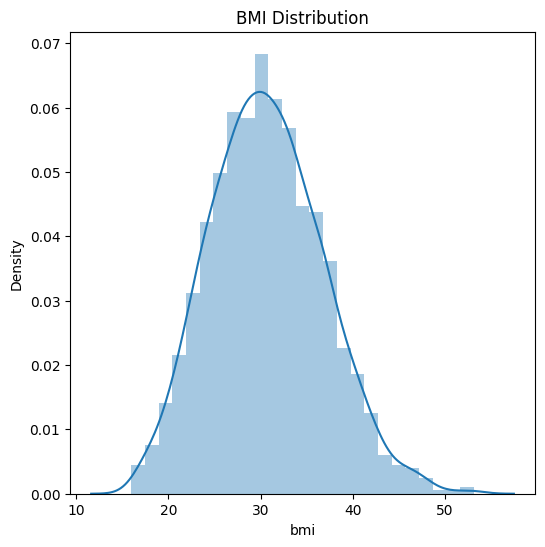

In [41]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()


Normal bmi range --> 18.5 to 24.9

<Axes: xlabel='region', ylabel='charges'>

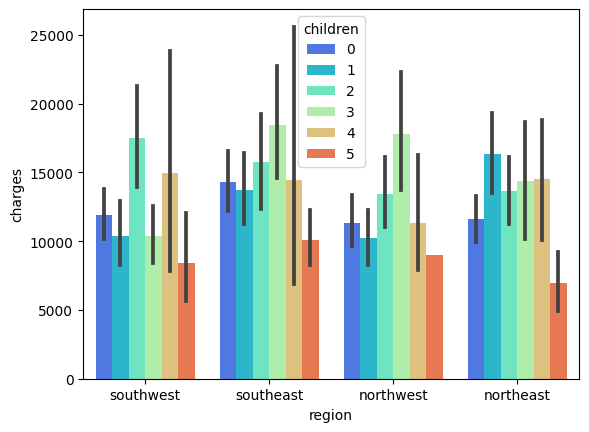

In [12]:
sns.barplot(x='region',y='charges',data=insurance_dataset,hue='children',palette='rainbow')

In [13]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

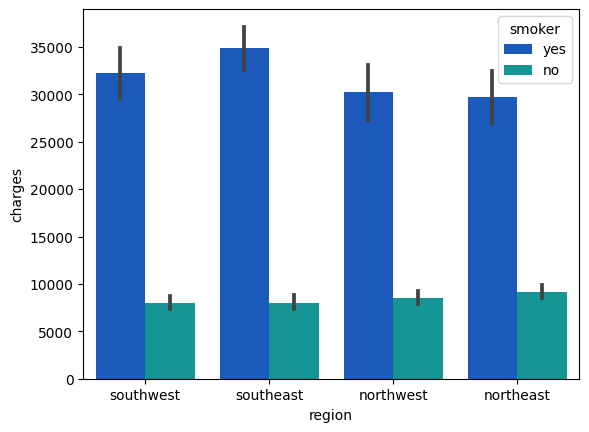

In [14]:
sns.barplot(x='region',y='charges',data=insurance_dataset,hue='smoker',palette='winter')

In [15]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

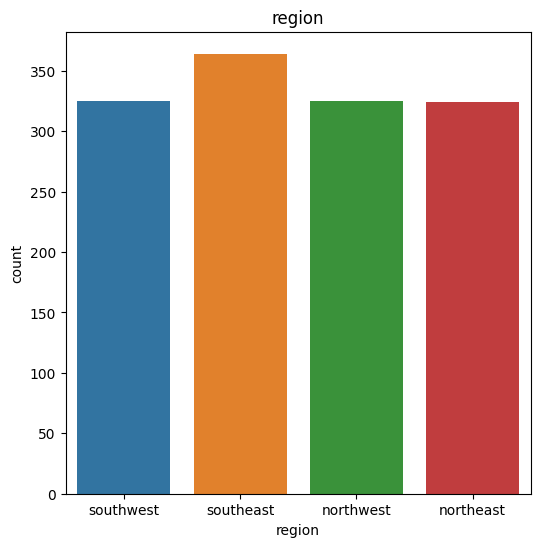

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title("region")
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\sansk\AppData\Local\Temp\ipykernel_12496\925591753.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'],bins=30)


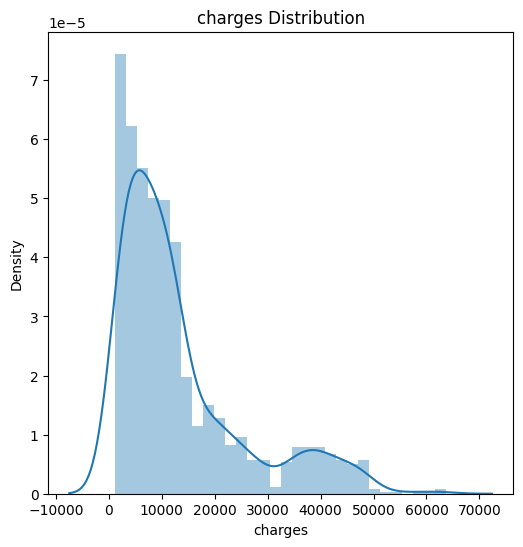

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'],bins=30)
plt.title("charges Distribution")
plt.show()

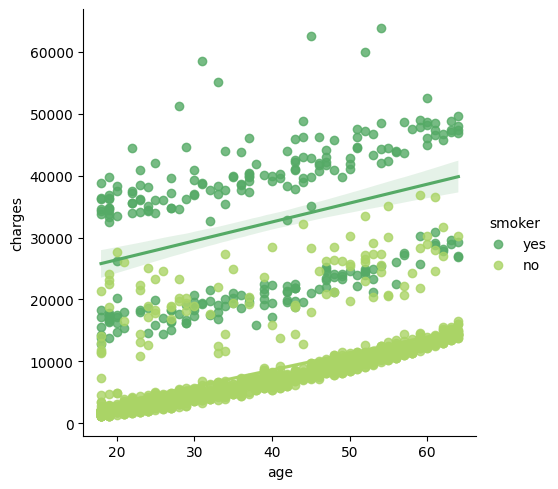

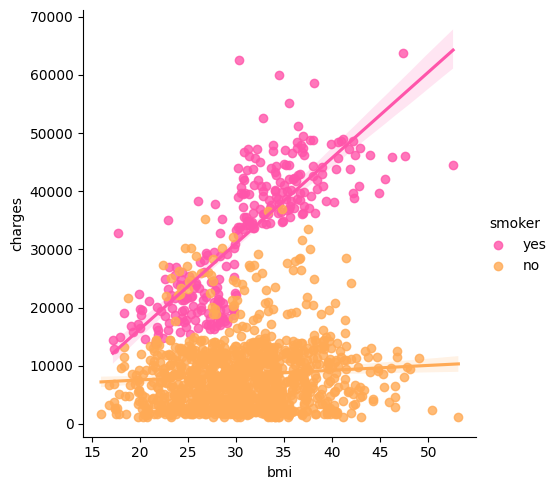

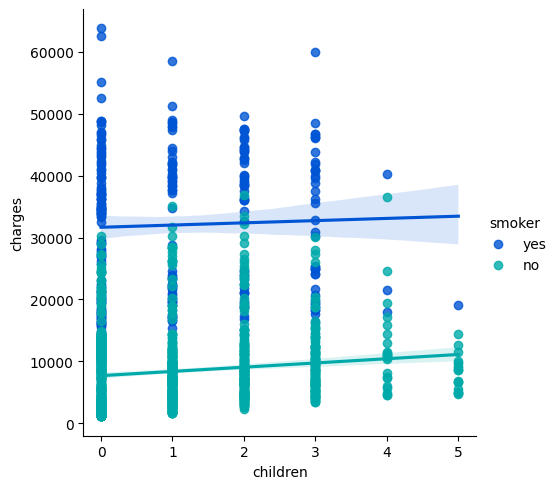

In [19]:
sns.lmplot(x='age',y='charges',data=insurance_dataset,hue='smoker',palette='summer')
sns.lmplot(x='bmi',y='charges',data=insurance_dataset,hue='smoker',palette='spring')
sns.lmplot(x='children',y='charges',data=insurance_dataset,hue='smoker',palette='winter')

Data pre-processing

Encoding the categorical features


In [20]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [21]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [22]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


<Axes: >

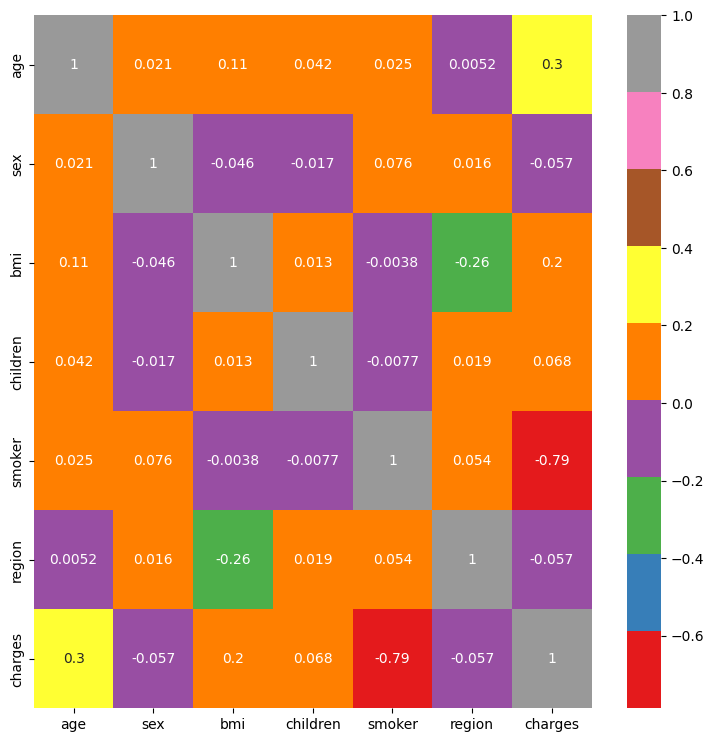

In [23]:
plt.subplots(1, 1, figsize=(9,9))
sns.heatmap(insurance_dataset.corr(), annot=True,cmap='Set1')

spliting the features and target


In [24]:
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [25]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


training the model

In [28]:
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

mdoel evaluation

In [42]:
#prediction on training data
training_data_prediction=model.predict(x_train)
training_data_prediction

array([ 7591.66570031, 33250.20633513,  9248.53528674, ...,
        2433.45723822,   132.62093048, 38990.86386474])

In [31]:
#R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value : ',r2_train)

R squared value :  0.7370419557075617


In [32]:
#prediction on texting data
test_data_prediction=model.predict(x_test)

In [33]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.8000725951720891


building predictive system

In [34]:
input_data=(31,1,25.74,0,1,1)

input_data_as_nparray=np.asarray(input_data)

input_data_reshaped=input_data_as_nparray.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
print('the insurance cost in usd ',prediction[0])

[4158.32239206]
the insurance cost in usd  4158.322392055706


e:\newpy\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
rfr = RandomForestRegressor(n_estimators=100,random_state=1,n_jobs=-1)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [43]:
training_data_prediction_rfr=model.predict(x_train)
training_data_prediction_rfr

array([ 7591.66570031, 33250.20633513,  9248.53528674, ...,
        2433.45723822,   132.62093048, 38990.86386474])

In [48]:
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)


rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The rfr model performance for training set:")
print("\n")
print("MSE is ",mean_squared_error(y_train, y_train_pred))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set


rmse_rfr = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
score_rfr= r2_score(y_test, y_test_pred)

print("The rfr model performance for testing set:")
print("\n")
print("MSE is ",mean_squared_error(y_test, y_test_pred))
print('RMSE is {}'.format(rmse_rfr))
print('R2 score is {}'.format(score_rfr)) 

The rfr model performance for training set:


MSE is  3733141.4832553174
RMSE is 1932.1339195964956
R2 score is 0.9742397554577454


The rfr model performance for testing set:


MSE is  17627770.9996166
RMSE is 4198.543914217952
R2 score is 0.8847071018337943


In [44]:
r2_train_rfr=metrics.r2_score(y_train,training_data_prediction_rfr)
print('R squared value : ',r2_train_rfr)

R squared value :  0.7370419557075617


smoker      0.607338
bmi         0.214740
age         0.135143
children    0.021403
region      0.015458
sex         0.005917
dtype: float64


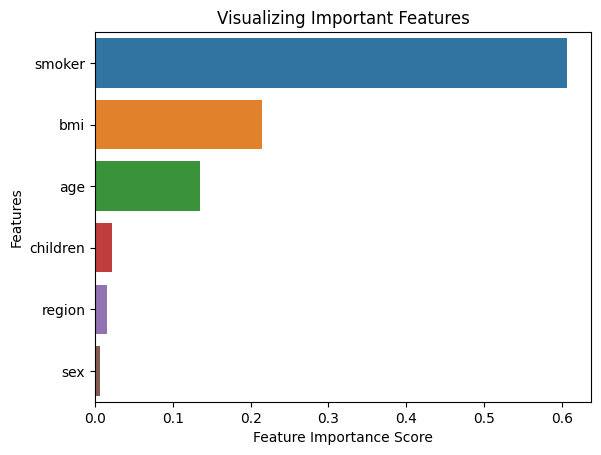

In [39]:
#Extracting important features
feature_imp = pd.Series(rfr.feature_importances_,index= x_train.columns).sort_values(ascending=False)
print(feature_imp)

# Visualizing our Random forest regressor
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
